# 8.3.4 Boosting

In [1]:
library(tree)
library(ISLR2)
library(randomForest)
set.seed(1)
train <- sample(1:nrow(Boston), nrow(Boston) / 2)
boston.test <- Boston[-train, "medv"]
bag.boston <- randomForest(medv ~ ., data = Boston, subset = train, mtry = 12, importance = TRUE)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



Here we use the `gbm` package, and within it the `gbm()` function, to fit boosted regression trees to the `Boston` data set. We run `gbm()` with the option `distribution = "gaussian"` since this is a regression problem; if it were a binary classification problem, we would use `distribution = "bernoulli"`. The argument `n.trees = 5000` indicates that we want $5000$ trees, and the option `interaction.depth = 4` limits the depth of each tree.

In [2]:
library(gbm)
set.seed(1)
boost.boston <- gbm(medv ~ ., data = Boston[train,], distribution = "gaussian", n.trees = 5000, interaction.depth = 4)

Loaded gbm 2.1.8.1



The `summary()` function produces a relative influence plot and also outputs the relative influence statistics.

,var,rel.inf
,<chr>,<dbl>
rm,rm,44.48249588
lstat,lstat,32.70281223
crim,crim,4.85109954
dis,dis,4.48693083
nox,nox,3.75222394
age,age,3.19769210
ptratio,ptratio,2.81354826
tax,tax,1.54417603
indus,indus,1.03384666


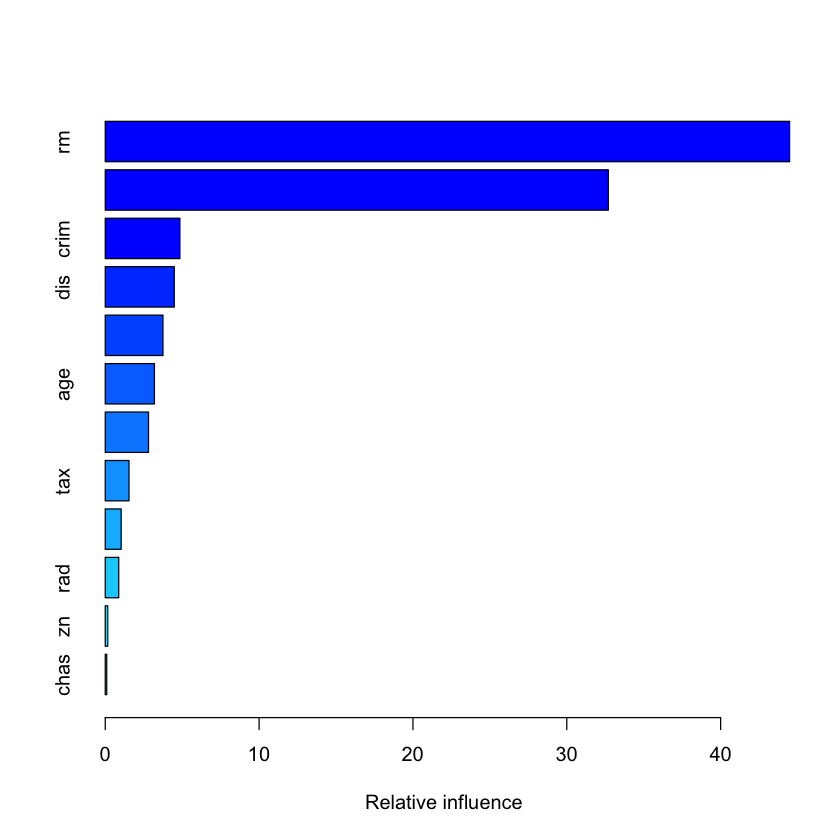

In [3]:
summary(boost.boston)

We see that `lstat` and `rm` are by far the most important variables. We can also produce _partial dependence plots_ for these two variables. These plots illustrate the marginal effec of the selected variables on the response after _integrating_ out the other variables. In this case, as we might expect, median house prices are increasing with `rm` and decreasing with `lstat`.

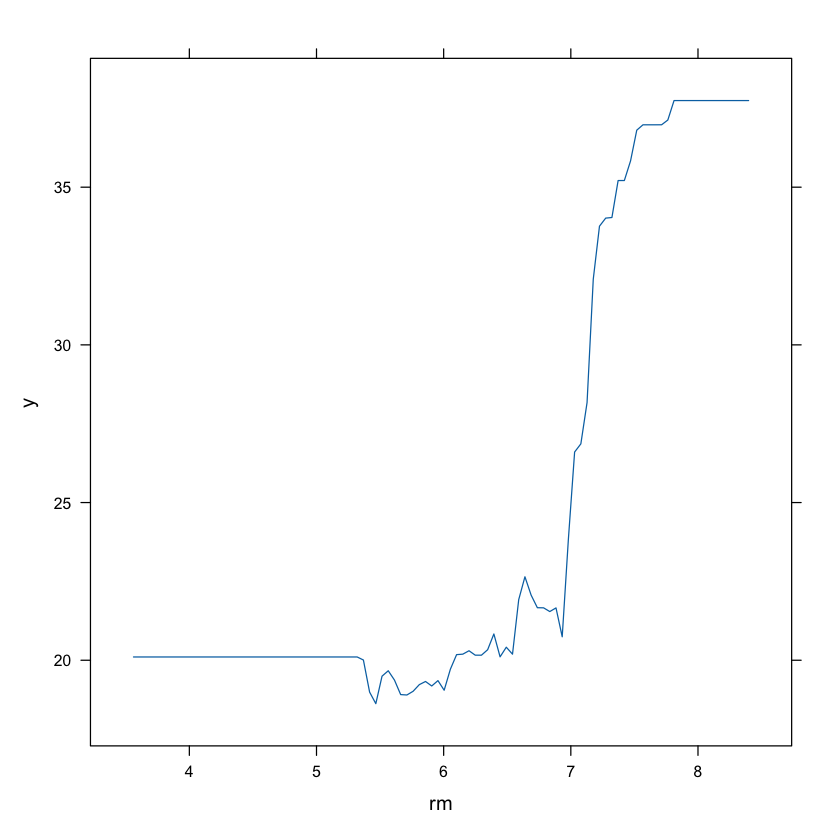

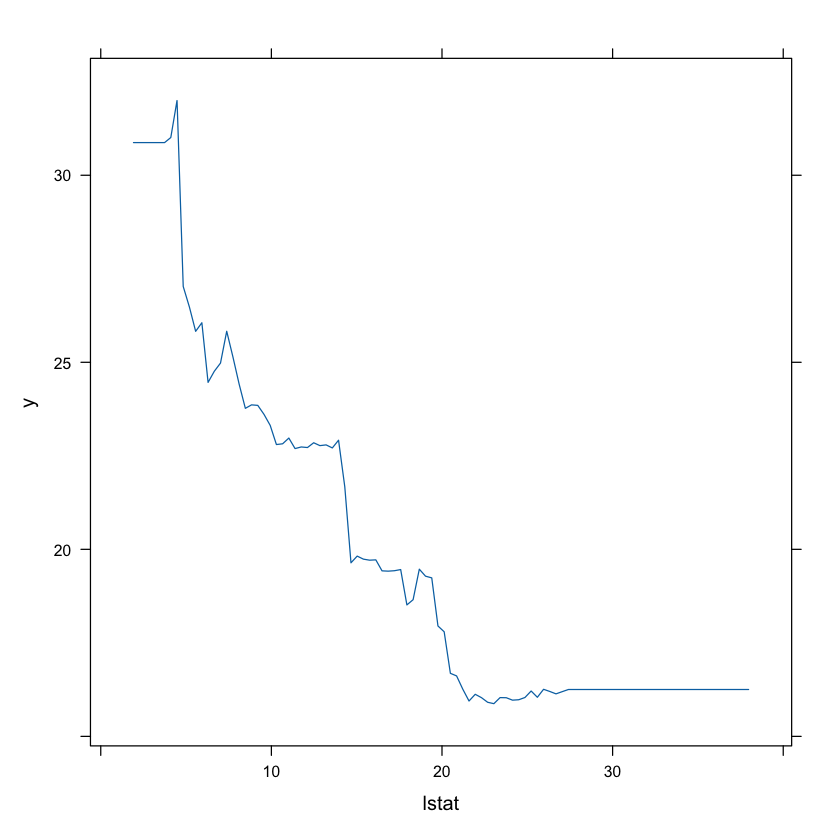

In [4]:
plot(boost.boston, i = "rm")
plot(boost.boston, i = "lstat")

We now use the boosted model to predict `medv` on the test set:

In [5]:
yhat.boost <- predict(boost.boston, newdata = Boston[-train,], n.trees = 5000)
mean((yhat.boost - boston.test)^2)

[1] 18.39057

The test MSE obtained is $18.39$: this is superior to the test MSE of random forests and bagging. If we want to, we can perform boosting with a different value of the shrinkage parameter $\lambda$ in (8.10). The default value is $0.001$, but this is easily modified. Here we take $\lambda = 0.2$.

In [6]:
boost.boston <- gbm(medv ~ ., data = Boston[train,], distribution = "gaussian",
                    n.trees = 5000, interaction.depth = 4, shrinkage = 0.2, verbose = F)
yhat.boost <- predict(boost.boston, newdata = Boston[-train,], n.trees = 5000)
mean((yhat.boost - boston.test)^2)

[1] 16.54778

In this case, using $\lambda = 0.2$ leads to a lower test MSE than $\lambda = 0.001$.